In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg as LA
%load_ext autoreload
%autoreload 2
from utils import *

# Images for different values of N

In [3]:
# parameters
Lx, Ly, eps, p = 201, 201, 0.5, 1.5
ax, ay = (Lx-1)*eps/2, (Ly-1)*eps/2 #size of the box
xx, yy = np.linspace(-ax, ax, Lx), np.linspace(-ay, ay, Ly)

## N = 1

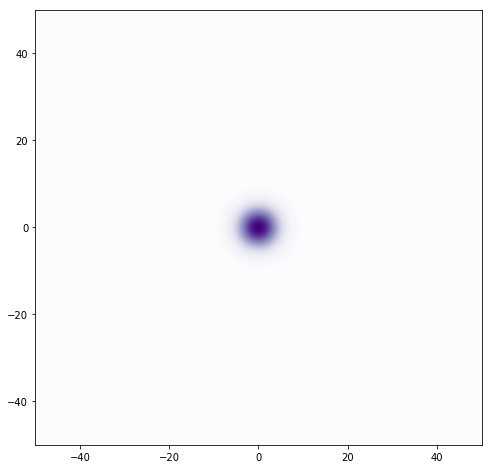

In [8]:
# First rho0
xgrid, ygrid = np.meshgrid(xx, yy)
def f_exp(x,y): return np.exp(-(x**2 + y**2)/20)
rho1_0 = f_exp(xgrid, ygrid)
rho1_0 /= integral(rho1_0, eps)

plt.figure(figsize=(8,8))
plt.contourf(xx, yy, rho1_0, cmap='Purples', levels=100)

In [138]:
def get_rho(rho0, nelec, load = True):
    if not load:
        rho, I = find_best_gamma(rho0, nelec, p, eps, tol=1e-8, Niter=30) 
        res = {"nelec": nelec, "rho" : rho, "I" : I, "Lx" : Lx, "Ly" : Ly,"eps" : eps,"p" : p}
        np.save("Computation_severalN/N%d"%nelec, res)
        return rho, I
    else:
        res = np.load("Computation_severalN/N%d.npy"%nelec).item()
        assert res["Lx"] == Lx and res["Ly"] == Ly and res["p"] == p and res["eps"] == eps
        return res["rho"], res["I"]

In [16]:
rho1, I1 = get_rho(rho1_0, 1, load = True)

I1 =  -0.016137323138647113


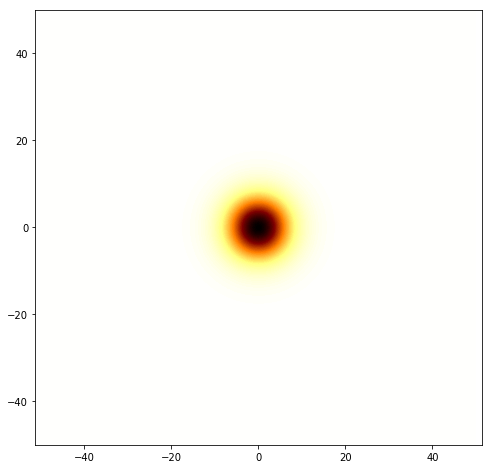

In [35]:
print("I1 = ", I1)

# plot result
plt.figure(figsize=(8,8))
plt.contourf(xx, yy, rho1, cmap = 'afmhot_r', levels=100)
_ = plt.axis('equal')
plt.savefig("p15N1.png", bbox_inches="tight")

# N = 2

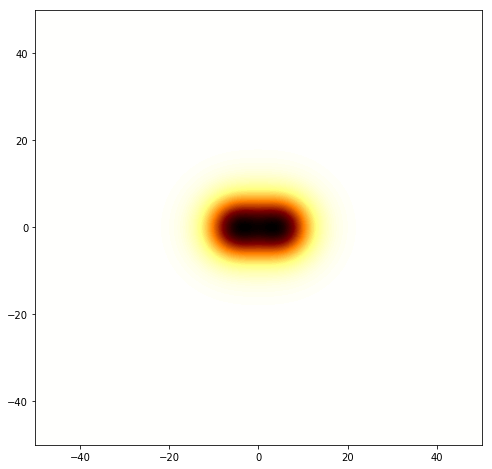

In [36]:
shift = 20
rho2_0 = np.roll(rho1, - shift//2, axis = 1) + np.roll(rho1, shift//2, axis = 1)

plt.figure(figsize=(8,8))
plt.contourf(xx, yy, rho2_0, cmap='afmhot_r', levels=100)

In [20]:
nelec = 2
rho2, I2 = get_rho(rho2_0, nelec)

p =  1.5
I1 =	 -0.016137323138647113
I2/2 =	 -0.016312934523750874
Energy gain (in percent) 0.010882311991583696


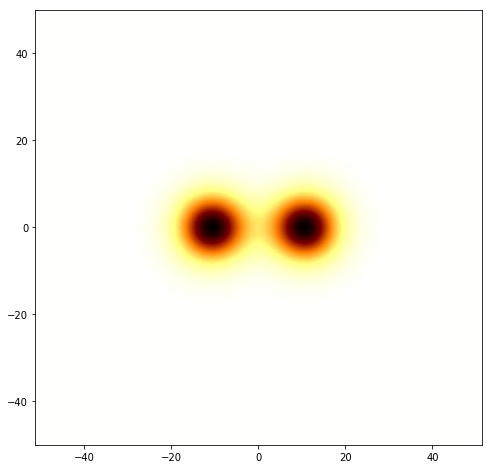

In [195]:
print("p = ", p)
print("I1 =\t", I1)
print("I2/2 =\t", I2/2)
print("Energy gain (in percent)", (I2/2-I1)/I1)

# plot result
plt.figure(figsize=(8,8))
plt.contourf(xx, yy, rho2, cmap='afmhot_r', levels=100)
_ = plt.axis('equal')
plt.savefig("p15N2.png", bbox_inches = 'tight')

# N = 3

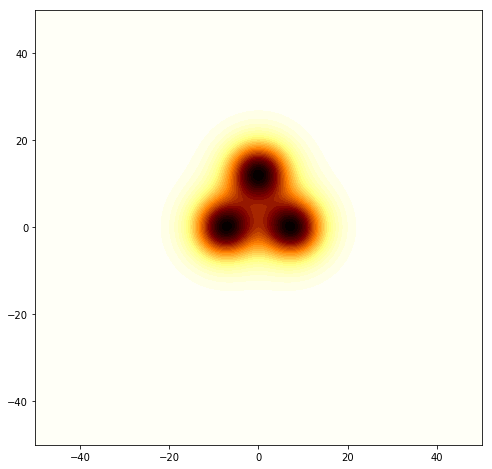

In [38]:
#second test, with a triangle
shift = 30
rho3_0 = np.roll(rho1, -shift//2, axis = 1) 
rho3_0 += np.roll(rho1, shift//2, axis = 1) 
rho3_0 += np.roll(rho1, int(shift/2*np.sqrt(3)), axis = 0)

plt.figure(figsize=(8,8))
plt.contourf(xx, yy, rho3_0, cmap='afmhot_r', levels=40)

In [39]:
nelec = 3
rho3, I3 = get_rho(rho3_0, nelec)

p =  1.5
I1 =  -0.016137323138647113
I3/3 =  -0.016605068648942095
that is (in percent) 0.028985322179908693


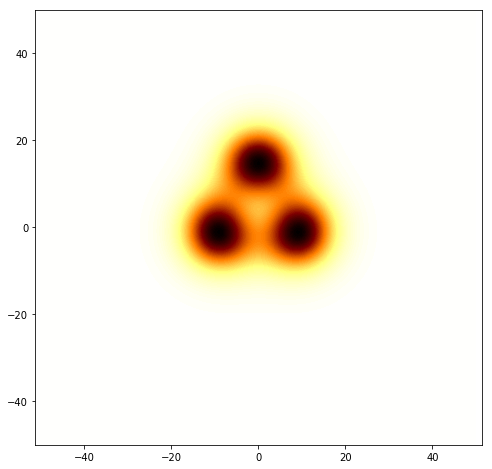

In [198]:
print("p = ", p)
print("I1 = ", I1)
print("I3/3 = ", I3/3)
print("that is (in percent)", (I3/3-I1)/I1)

# plot result
plt.figure(figsize=(8,8))
plt.contourf(xx, yy, rho3, cmap='afmhot_r', levels=100)
_ = plt.axis('equal')
plt.savefig("p15N3.png", bbox_inches="tight")

# N = 4

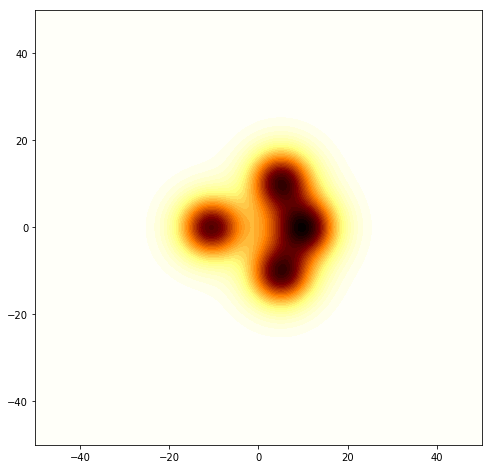

In [69]:
nelec = 4
rho4_0 = rho2 + np.roll(rho2.T, 10, axis = 1)

plt.figure(figsize=(8,8))
plt.contourf(xx, yy, rho4_0, cmap='afmhot_r', levels=40)

In [72]:
rho4, I4 = find_best_gamma(rho4, 4, p, eps, tol=1e-8, Niter=30)

Find best gamma with the following parameters:
nelec =  4
p =  1.5
Lx, Ly, eps, scale =  201 201 0.5 1
tol, Niter =  1e-08 30

Iteration  0
	Normalised Energy =  -0.016625852409622267
	kinetic =  0.06626944529543953 potential =  -0.1327728549339286
	Viriel =  -0.0001169821715247682

Iteration  1
	Normalised Energy =  -0.016632137358831973
	kinetic =  0.06625312791024711 potential =  -0.132781677345575
	Viriel =  -0.00013771076254039116

Iteration  2
	Normalised Energy =  -0.016637916928657744
	kinetic =  0.06624546064474865 potential =  -0.13279712835937962
	Viriel =  -0.00015310353494116247

Iteration  3
	Normalised Energy =  -0.01664313414121763
	kinetic =  0.06624544847940884 potential =  -0.13281798504427936
	Viriel =  -0.00016354404273083434

Iteration  4
	Normalised Energy =  -0.016647756948435483
	kinetic =  0.06625195945298781 potential =  -0.13284298724672974
	Viriel =  -0.00016953417037705865

Iteration  5
	Normalised Energy =  -0.016651778665332302
	kinetic =  0.066263788276

p =  1.5
I1 =  -0.016137323138647113
I4/4 =  -0.01666938235439774
that is (in percent) 0.032970723284111714


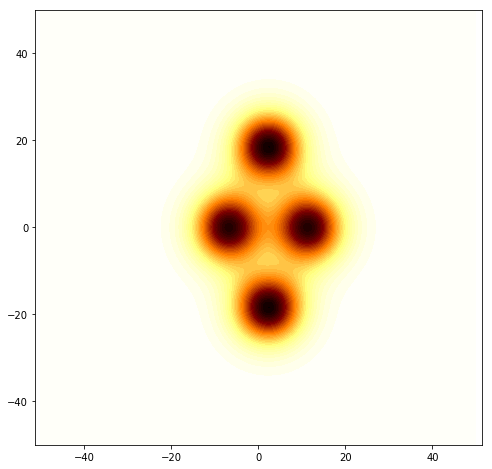

In [197]:
print("p = ", p)
print("I1 = ", I1)
print("I4/4 = ", I4/4)
print("that is (in percent)", (I4/4-I1)/I1)

# plot result
plt.figure(figsize=(8,8))
plt.contourf(xx, yy, rho4, cmap='afmhot_r', levels=40)
_ = plt.axis('equal')
plt.savefig("p15N4.png", bbox_inches = 'tight')

In [78]:
print("I3 + I1 = ", I3 + I1)
print("2 I2 = ", 2*I2)
print("I4 = ", I4)
print("")

II = [0, I1, I2, I3, I4]
for i in range(1,5):
    print("I%d/%d = %f"%(i, i, II[i]/i))

I3 + I1 =  -0.0659525290854734
2 I2 =  -0.0652517380950035
I4 =  -0.06667752941759096

I1/1 = -0.016137
I2/2 = -0.016313
I3/3 = -0.016605
I4/4 = -0.016669


# N = 5

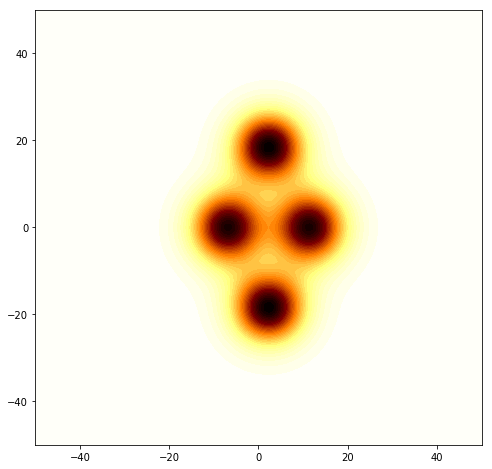

In [113]:
# first test, with a spherical start
rho5_0 = 5/4*rho4
nelec = 5

plt.figure(figsize=(8,8))
plt.contourf(xx, yy, rho5_0, cmap='afmhot_r', levels=40)

In [118]:
rho5, I5 = find_best_gamma(rho5, 5, p, eps, tol=1e-8, Niter=30)

Find best gamma with the following parameters:
nelec =  5
p =  1.5
Lx, Ly, eps, scale =  201 201 0.5 1
tol, Niter =  1e-08 30

Iteration  0
	Normalised Energy =  -0.016734441239575328
	kinetic =  0.08419167072322287 potential =  -0.1678638769210995
	Viriel =  0.000259732262673118

Iteration  1
	Normalised Energy =  -0.016734740575689515
	kinetic =  0.08418089846533833 potential =  -0.1678546013437859
	Viriel =  0.00025359779344537314

Iteration  2
	Normalised Energy =  -0.016735013340243788
	kinetic =  0.08416956537943521 potential =  -0.16784463208065414
	Viriel =  0.0002472493391081354

Iteration  3
	Normalised Energy =  -0.016735261962989363
	kinetic =  0.08415779764027541 potential =  -0.16783410745522223
	Viriel =  0.00024074391266429296

Iteration  4
	Normalised Energy =  -0.01673548864730077
	kinetic =  0.08414570695037724 potential =  -0.16782315018688107
	Viriel =  0.0002341318569367007

Iteration  5
	Normalised Energy =  -0.016735695391670934
	kinetic =  0.08413339166627538 p

p =  1.5
I1 =  -0.016137323138647113
I5/5 =  -0.016737651841289718
that is (in percent) 0.037201256830811255


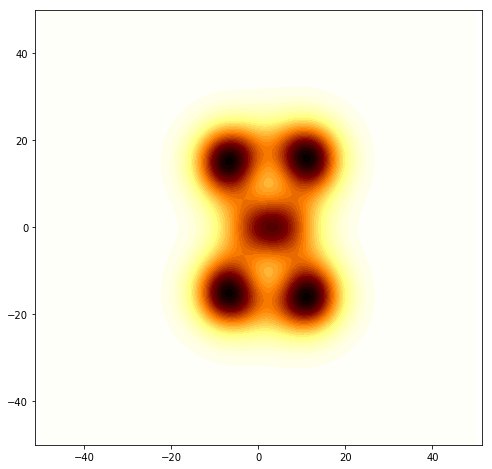

In [122]:
print("p = ", p)
print("I1 = ", I1)
print("I5/5 = ", I5/5)
print("that is (in percent)", (I5/5-I1)/I1)

# plot result
plt.figure(figsize=(8,8))
plt.contourf(xx, yy, rho5, cmap='afmhot_r', levels=40)
_ = plt.axis('equal')
plt.savefig("p15N5.png", bbox_inches="tight")

In [123]:
N5 = {
    "nelec": 5,
    "rho" : rho5,
    "I" : I5,
    "Lx" : Lx,
    "Ly" : Ly,
    "eps" : eps,
    "p" : p
}
np.save("Computation_severalN/N5", N5)

# N = 6

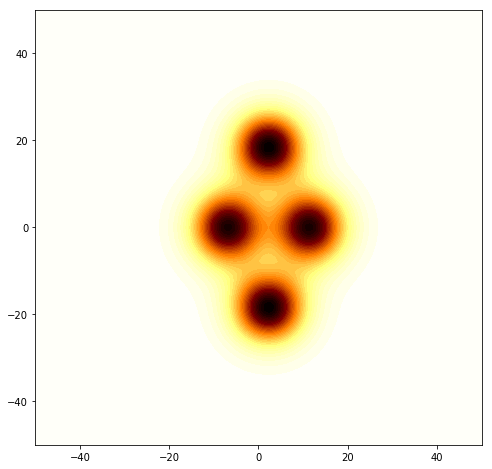

In [124]:
nelec = 6
rho6_0 = rho4

plt.figure(figsize=(8,8))
plt.contourf(xx, yy, rho5_0, cmap='afmhot_r', levels=40)

In [125]:
rho6, I6 = get_rho(rho6_0, 6)

p =  1.5
I1 =  -0.016137323138647113
I6/6 =  -0.016836732888360077
that is (in percent) 0.04334112564418793


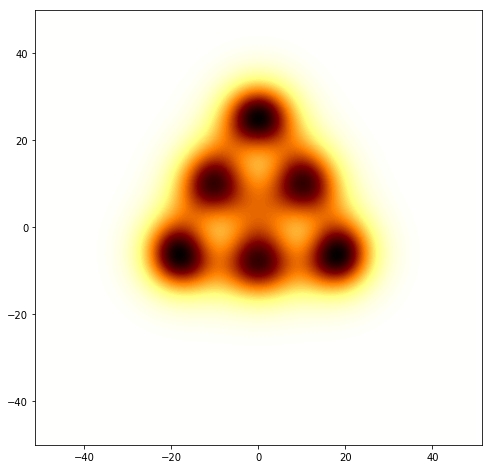

In [128]:
print("p = ", p)
print("I1 = ", I1)
print("I6/6 = ", I6/6)
print("that is (in percent)", (I6-6*I1)/(6*I1))

# plot result
plt.figure(figsize=(8,8))
plt.contourf(xx, yy, rho6, cmap='afmhot_r', levels=100)
_ = plt.axis('equal')
plt.savefig("p15N6.png", bbox_inches="tight")

In [129]:
N6 = {
    "nelec": 6,
    "rho" : rho6,
    "I" : I6,
    "Lx" : Lx,
    "Ly" : Ly,
    "eps" : eps,
    "p" : p
}
np.save("Computation_severalN/N6", N6)

# N = 7

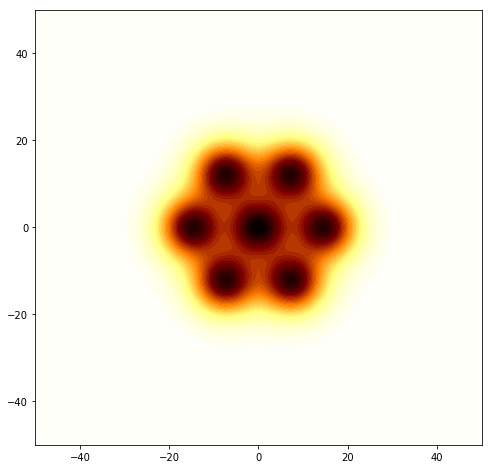

In [165]:
nelec = 7
dist = 35
rho7_0 = rho1 + np.roll(rho1, dist, axis = 1)
rho7_0 += np.roll(rho1, -dist, axis = 1)
rho7_0 += np.roll( np.roll(rho1, dist//2, axis = 1), int(np.sqrt(3)*dist/2), axis = 0)
rho7_0 += np.roll( np.roll(rho1, -dist//2, axis = 1), int(np.sqrt(3)*dist/2), axis = 0)
rho7_0 += np.roll( np.roll(rho1, dist//2, axis = 1), -int(np.sqrt(3)*dist/2), axis = 0)
rho7_0 += np.roll( np.roll(rho1, -dist//2, axis = 1), -int(np.sqrt(3)*dist/2), axis = 0)

plt.figure(figsize=(8,8))
plt.contourf(xx, yy, rho7_0, cmap='afmhot_r', levels=40)

In [169]:
rho7, I7 = get_rho(rho7, nelec) 

p =  1.5
I1 =  -0.016137323138647113
I7/7 =  -0.016831423350451586
that is (in percent) -0.8571428571428572


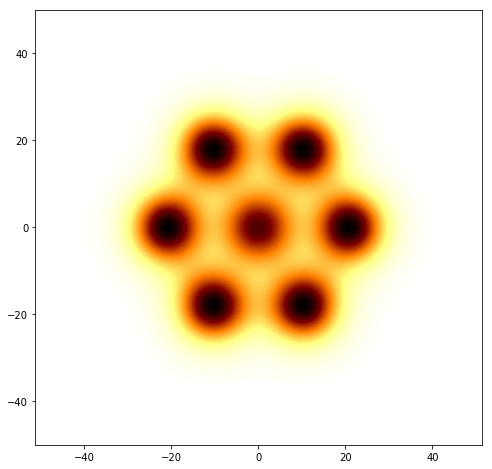

In [170]:
print("p = ", p)
print("I1 = ", I1)
print("I7/7 = ", I7/7)
print("that is (in percent)", (I7/7-I7)/I7)

# plot result
plt.figure(figsize=(8,8))
plt.contourf(xx, yy, rho7, cmap='afmhot_r', levels=100)
_ = plt.axis('equal')
plt.savefig("p15N7.png", bbox_inches="tight")

In [158]:
N7 = {
    "nelec": 7,
    "rho" : rho7,
    "I" : I7,
    "Lx" : Lx,
    "Ly" : Ly,
    "eps" : eps,
    "p" : p
}
np.save("Computation_severalN/N7", N7)

# N = 10

In [164]:
# First rho0
rho10_0 = 10/7*rho7
rho10, I10 = find_best_gamma(rho10_0, 10, p, eps, tol=1e-8, Niter=400)

Find best gamma with the following parameters:
nelec =  10
p =  1.5
Lx, Ly, eps, scale =  201 201 0.5 1
tol, Niter =  1e-08 400

Iteration  0
	Normalised Energy =  -0.016239263945539806
	kinetic =  0.21682931317792126 potential =  -0.3792219526333193
	Viriel =  0.0272183368612616


KeyboardInterrupt: 

p =  1.5
I1 =  -0.016137323138647113
I10 =  -0.1696365115977811
Energy gain =  -0.008263280211309953
that is (in percent) 0.05120601564654987


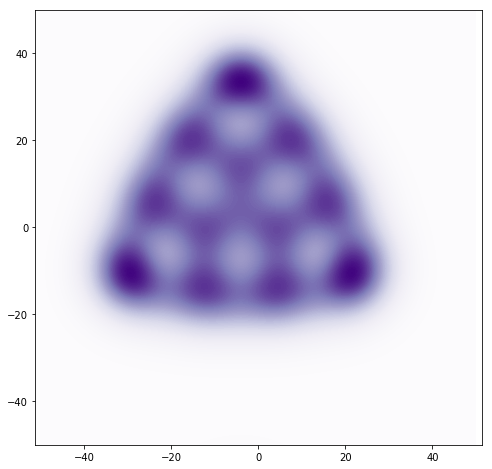

In [71]:
rho10_saved = np.roll(rho10, -8, axis = 1)
I10_saved = I10

print("p = ", p)
print("I1 = ", I1)
print("I10 = ", I10)
print("Energy gain = ", I10 - 10*I1)
print("that is (in percent)", (I10-10*I1)/(10*I1))

# plot result
plt.figure(figsize=(8,8))
plt.contourf(xx, yy, rho10_saved, cmap='Purples', levels=140)
_ = plt.axis('equal')
plt.savefig('p15N10.png', bbox_inches='tight')

In [ ]:
N10 = {
    "nelec": 10,
    "rho" : rho10,
    "I" : I10,
    "Lx" : Lx,
    "Ly" : Ly,
    "eps" : eps,
    "p" : p
}
np.save("Computation_severalN/N10", N10)

# N = 12

In [ ]:
# First rho0
rho12_0 = 12/10*rho10
rho12, I12 = find_best_gamma(rho12_0, 12, p, eps, tol=1e-8, Niter=400)

Find best gamma with the following parameters:
nelec =  12
p =  1.5
Lx, Ly, eps, scale =  201 201 0.5 1
tol, Niter =  1e-08 400

Iteration  0
	Energy =  -0.19730436088378858
	kinetic =  0.24413970570869117 potential =  -0.44144406659247976
	Viriel =  0.023417672412451296

Iteration  1
	Energy =  -0.20003027267445597
	kinetic =  0.23682835649051517 potential =  -0.43685862916497115
	Viriel =  0.0183990419080296

Iteration  2
	Energy =  -0.2014982813105667
	kinetic =  0.23221899866056991 potential =  -0.4337172799711366
	Viriel =  0.0153603586750016

Iteration  3
	Energy =  -0.20231560279839414
	kinetic =  0.22884874755215281 potential =  -0.43116435035054695
	Viriel =  0.013266572376879338

Iteration  4
	Energy =  -0.20280203789025894
	kinetic =  0.22612143348521138 potential =  -0.4289234713754703
	Viriel =  0.01165969779747622

Iteration  5
	Energy =  -0.20311227767765888
	kinetic =  0.22379572391109587 potential =  -0.42690800158875475
	Viriel =  0.010341723116718493

Iteration  6
	E

In [ ]:
rho12_saved = np.roll(rho12, -8, axis = 1)
I12_saved = I12

print("p = ", p)
print("I1 = ", I1)
print("I12 = ", I12)
print("Energy gain = ", I12 - 12*I1)
print("that is (in percent)", (I12-12*I1)/(12*I1))

# plot result
plt.figure(figsize=(8,8))
plt.contourf(xx, yy, rho10_saved, cmap='Purples', levels=140)
_ = plt.axis('equal')
plt.savefig('p15N12.png', bbox_inches='tight')

In [ ]:
N12 = {
    "nelec": 12,
    "rho" : rho12,
    "I" : I12,
    "Lx" : Lx,
    "Ly" : Ly,
    "eps" : eps,
    "p" : p
}
np.save("Computation_severalN/N12", N12)

# Other

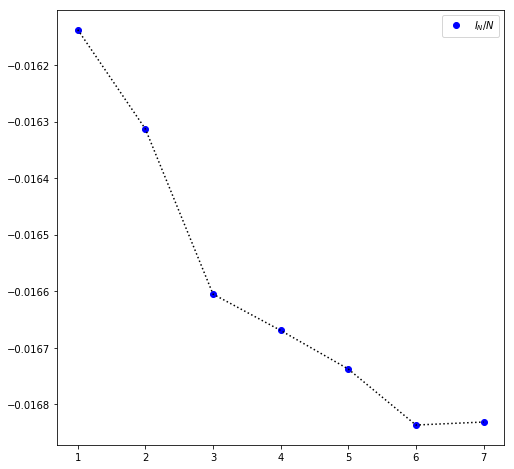

In [199]:
NN = np.array([1,2,3,4,5,6, 7])
II = np.array([I1, I2, I3, I4, I5, I6, I7])

plt.figure(figsize=(8,8))
plt.plot(NN, II/NN, 'ob', label=r"$I_N/N$")
plt.plot(NN, II/NN, 'k:')
plt.legend()
plt.savefig("INoverN.png", bbox_inches = 'tight')


In [193]:
II/NN

array([-0.01613732, -0.01631293, -0.01660507, -0.01666938, -0.01673765,
       -0.01683673, -0.01683142])